In [19]:
import numpy as np
import imageio
import nibabel as nib
import os
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

In [2]:
data_path = "E:/IIITB/MedicalImagingDecathalon/"
task = "Task04_Hippocampus"
path_tr = data_path+task+'/imagesTr'
path_tr_label = data_path+task+'/labelsTr'
path_ts = data_path+task+'/imagesTs'

In [3]:
imglist_tr = glob(path_tr+'/*.gz')
imglist_tr_label = glob(path_tr_label+'/*.gz')
imglist_ts = glob(path_ts+'/*.gz')
print('num_train = {}, num_test = {}'.format(len(imglist_tr), len(imglist_ts)))
print('Image dimensions:')
print('Train:')

for img_name in imglist_tr[:5]:
    img = nib.load(img_name)
    print(img.shape)

print('Test:')
for img_name in imglist_ts[:5]:
    img = nib.load(img_name)
    print(img.shape)

num_train = 260, num_test = 130
Image dimensions:
Train:
(35, 51, 35)
(34, 52, 35)
(36, 52, 38)
(35, 52, 34)
(34, 47, 40)
Test:
(39, 47, 36)
(34, 51, 34)
(34, 53, 27)
(36, 50, 26)
(36, 48, 32)


In [4]:
# Find number of sub labels
    
# Images

img = nib.load(imglist_tr[0]).get_fdata()
label = nib.load(imglist_tr_label[0]).get_fdata()
print('Image Min-Max values: Image = {},{} and label = {},{}'.format(img.min(),img.max(), 
                                                                  label.min(),label.max()))
print('Number of subclasses = ', int(label.max())+1)

Image Min-Max values: Image = 2.0,139.0 and label = 0.0,2.0
Number of subclasses =  3


In [5]:
print(" Image Shape :",str(img.shape))

 Image Shape : (35, 51, 35)


In [6]:
img.dtype

dtype('float64')

In [7]:
img1 = nib.load(imglist_tr[0]).get_fdata()
img1.dtype
img = img1.astype(np.uint8)

In [9]:
import scipy.misc
scipy.misc.imsave(os.path.join(data_path,'outfile.jpg'), img1[:,:,16].astype(np.uint8))

C:\Users\Sukanya\Anaconda3\envs\nn_net\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


In [10]:
import imageio
imageio.imwrite(os.path.join(data_path,'slide1.jpg'), img1[:, :, 0].astype(np.uint8), cmap='gray')

In [8]:
print(" z: ",img.shape[2])

 z:  35


In [13]:
def showSlices(image,label,imageName,columns=4):
    fig = plt.figure(figsize=(_figSize,_figSize))
    for i in range(2,z,5):
        f1 = fig.add_subplot("120")
        f1.set_title('Input image slice: '+str(i),fontsize =_fontsize)
        #plt.axis('off')
        plt.imshow(img[:,:,i], cmap='gray')
        imageio.imwrite(os.path.join(data_path,imageName+index+'.jpg'), 
                         img1[:, :, i].astype(np.uint8), cmap='gray')
        
        f2 = fig.add_subplot("121")
        f2.set_title('Segmentation Mask slice '+ str(i),fontsize =_fontsize)
        #plt.axis('off')
        plt.imshow(label[:,:,i], cmap='gray')
    plt.show()
    input()

In [9]:
_figSize = 50
_fontsize = 40

In [10]:
def show_image_mask(images, masks, columns=4, sliceOffset=5):
    fig = plt.figure(figsize=(_figSize,_figSize))
    z = images.shape[2]
    #rows = np.ceil((images.shape[0] + masks.shape[0]) / columns)
    rows = 5 #z//sliceOffset+1
    index = 1
    
    for i in range(0,z,5):
        f1 = fig.add_subplot(rows, columns, index)
        f1.set_title("Input image slice: "+str(i),fontsize =_fontsize)
        plt.axis('off')
        plt.imshow(images[:,:,i],cmap='gray')
        index += 1

        f2 = fig.add_subplot(rows, columns, index)
        f2.set_title('Segmentation Mask Slice: '+str(i),fontsize = _fontsize)
        plt.axis('off')
        plt.imshow(masks[:,:,i], cmap='gray')
        index += 1

    plt.show()

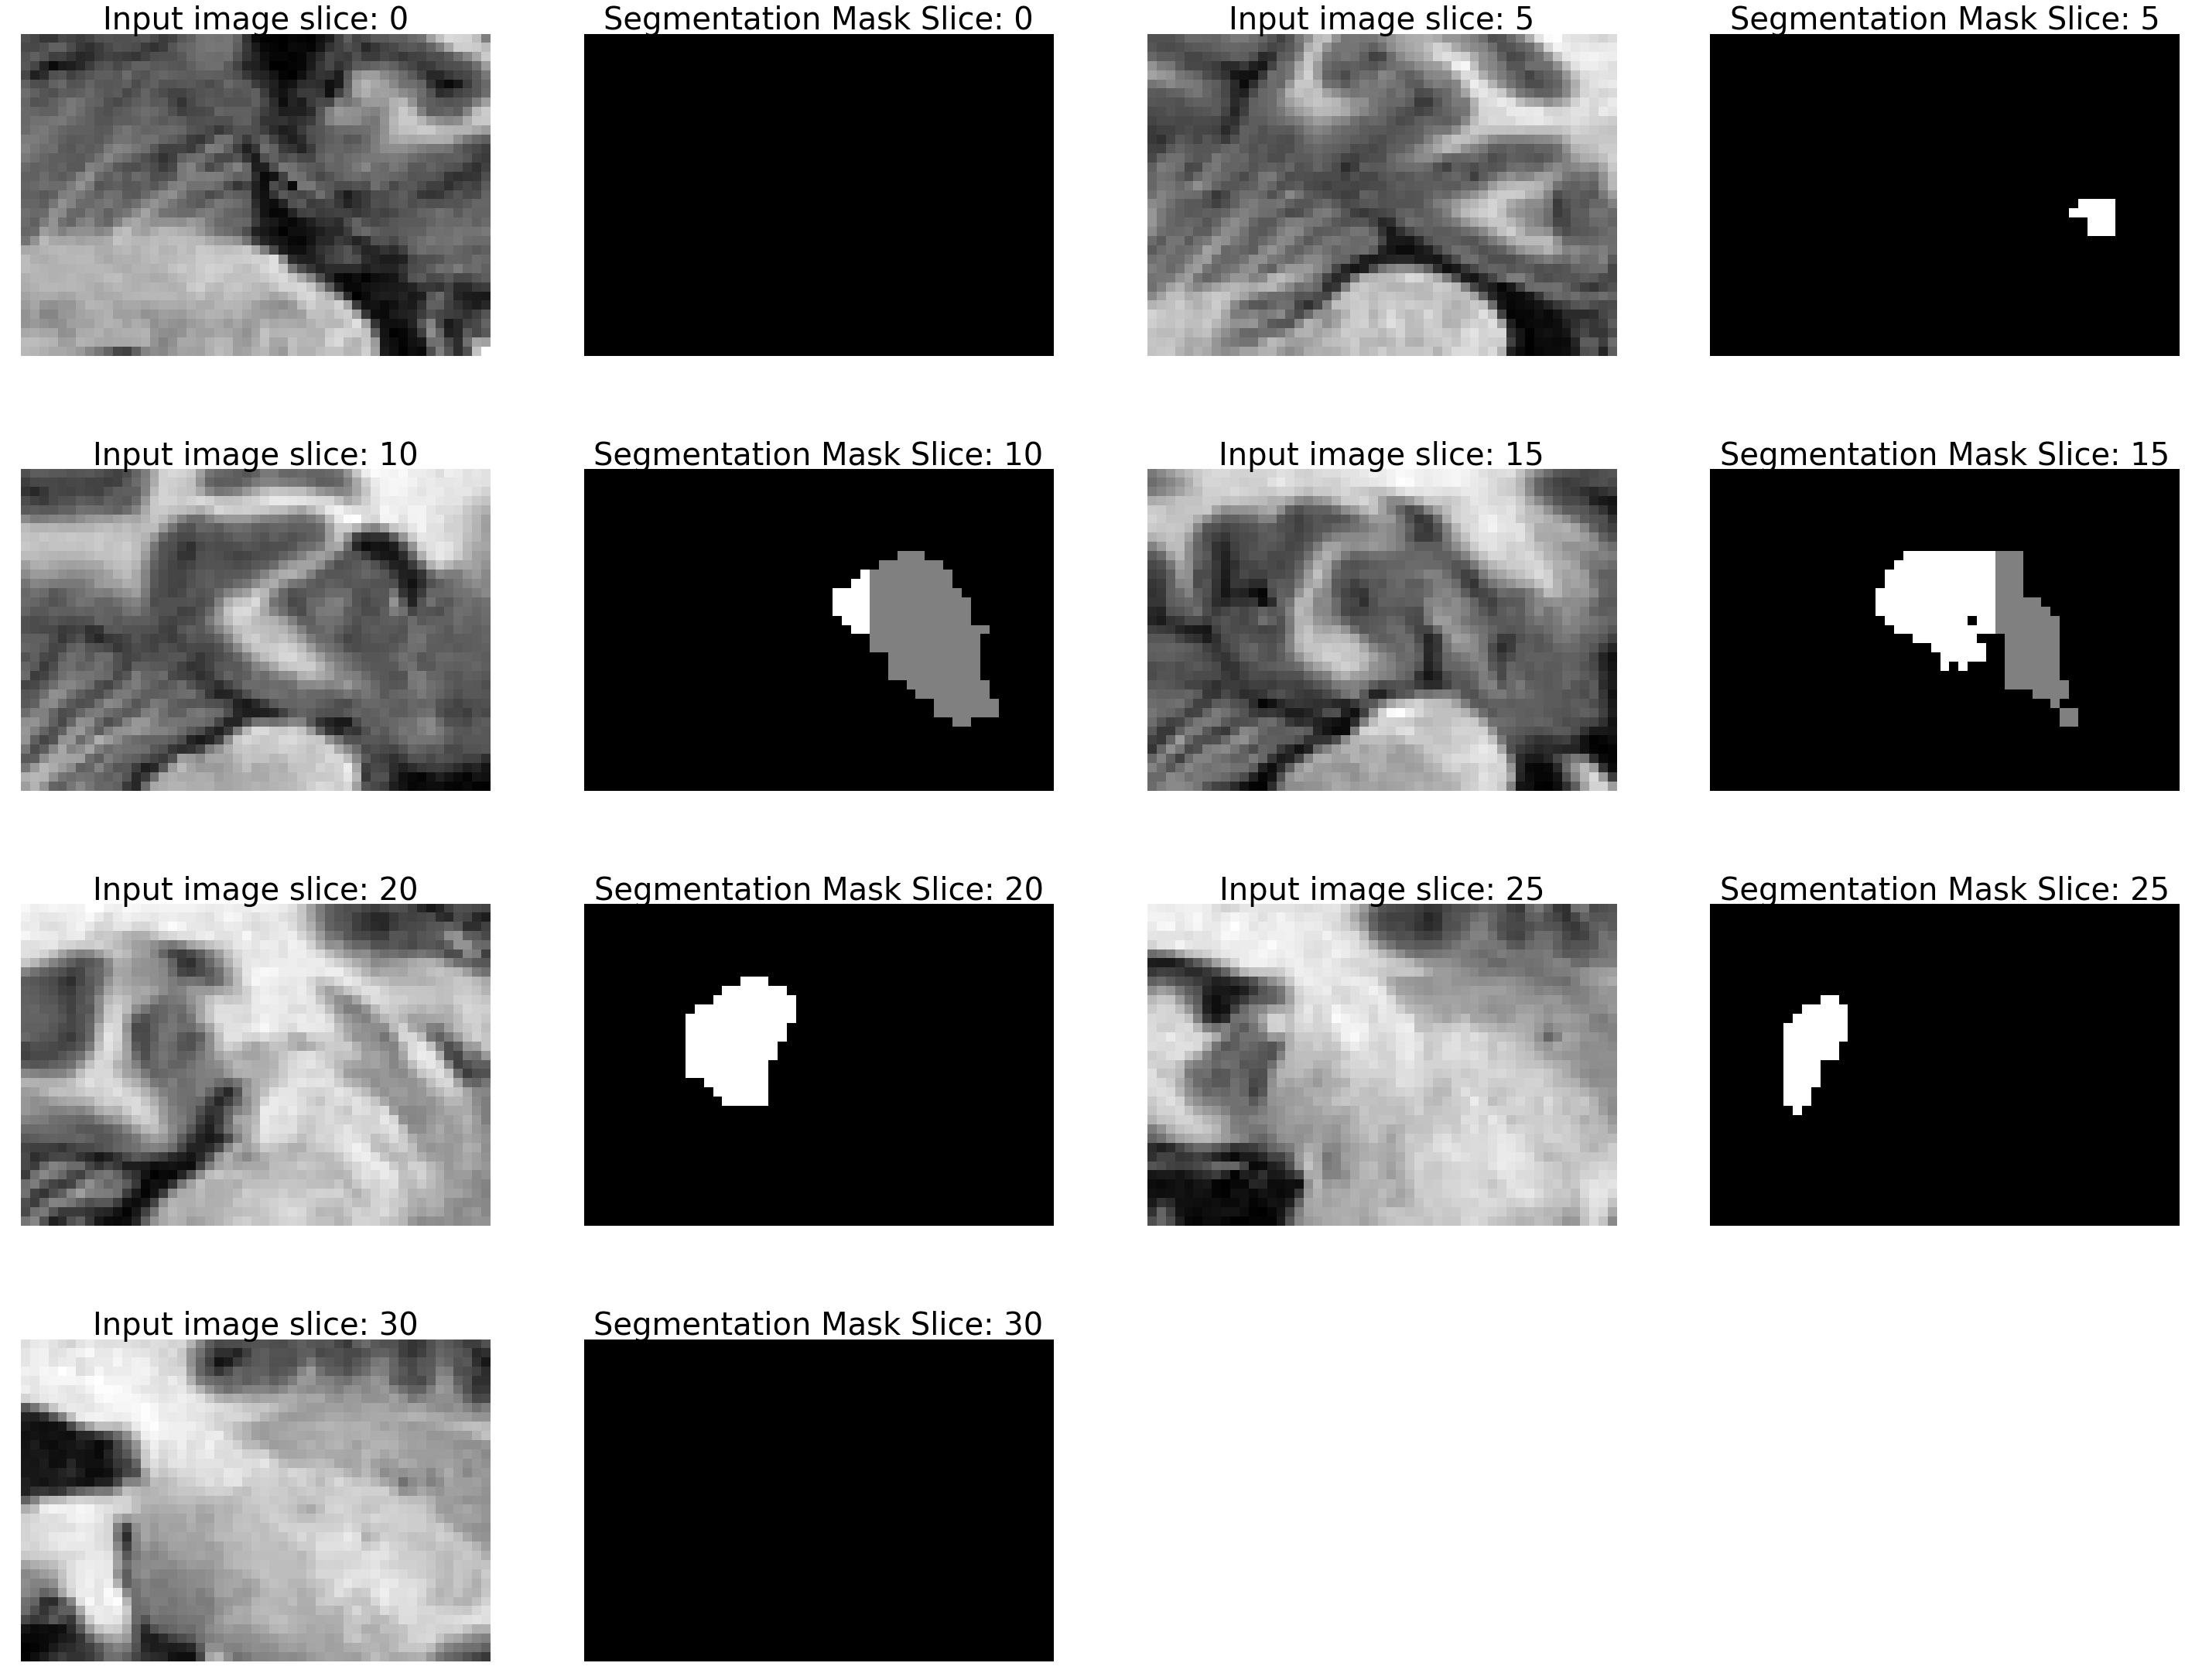

In [11]:
show_image_mask(img,label,4,5)

In [30]:
def storeImageSlices(task,columns=4,sliceOffset=5,figSize=256,fontSize=50):
    print(" Given Task : ",task)
    #task = "Task04_Hippocampus"
    path_tr = data_path+task+'/imagesTr'
    path_tr_label = data_path+task+'/labelsTr'
    path_ts = data_path+task+'/imagesTs'
    imageStorePath = data_path+task+"/preprocess"
    
    if not os.path.exists(imageStorePath):
        os.makedirs(imageStorePath)
        print('Created' + imageStorePath + '...')
    
    imglist_tr = glob(path_tr+'/*.gz')
    imglist_tr_label = glob(path_tr_label+'/*.gz')
    imglist_ts = glob(path_ts+'/*.gz')
    print('num_train = {}, num_test = {}'.format(len(imglist_tr), len(imglist_ts)))
    print('Image dimensions:')
   
    print('Train:')
    for img_name in imglist_tr[:5]:
        img = nib.load(img_name)
        print(img.shape)

    print('Test:')
    for img_name in imglist_ts[:5]:
        img = nib.load(img_name)
        print(img.shape)
        
    #for img,label in imglist_tr,imglist_tr_label:
    images = nib.load(imglist_tr[0]).get_fdata()
    #images = (images - images.min())/(images.max()-images.min())
    label = nib.load(imglist_tr_label[0]).get_fdata()
    print('Image Min-Max values: Image = {},{} and label = {},{}'.format(images.min(),images.max(),label.min(),label.max()))
    #print('Number of subclasses = ', int(label.max())+1)
    fig = plt.figure(figsize=(figSize,figSize))
    z = images.shape[2]
    #rows = np.ceil((images.shape[0] + masks.shape[0]) / columns)
    rows = z//sliceOffset
    index = 1
    
    for i in range(2,z,5):
        f1 = fig.add_subplot(rows, columns, index)
        f1.set_title("Input image slice: "+str(i),fontsize =_fontsize)
        plt.axis('off')
        plt.imshow(images[:,:,i],cmap='gray')
        #plt.savefig(os.path.join(imageStorePath,"image_"+str(i)+".jpg"))
        imageio.imwrite(os.path.join(imageStorePath,'image_'+str(i)+'.jpg'), images[:, :, i].astype(np.uint8), cmap='gray')
        index += 1

        f2 = fig.add_subplot(rows, columns, index)
        f2.set_title('Segmentation Mask Slice: '+str(i),fontsize = _fontsize)
        plt.axis('off')
        plt.imshow(label[:,:,i], cmap='gray')
        #plt.savefig(os.path.join(imageStorePath,"mask_"+str(i)+".jpg"))
        imageio.imwrite(os.path.join(imageStorePath,'mask_'+str(i)+'.jpg'), label[:, :, i].astype(np.uint8), cmap='gray')
        index += 1
    plt.show()
    #input() 

In [16]:
def storeActualImageSlices(task,columns=4,sliceOffset=5,figSize=256,fontSize=50):
    print(" Given Task : ",task)
    #task = "Task04_Hippocampus"
    path_tr = data_path+task+'/imagesTr'
    path_tr_label = data_path+task+'/labelsTr'
    path_ts = data_path+task+'/imagesTs'
    imageStorePath = data_path+task+"/preprocess"
    
    if not os.path.exists(imageStorePath):
        os.makedirs(imageStorePath)
        print('Created' + imageStorePath + '...')
    
    imglist_tr = glob(path_tr+'/*.gz')
    imglist_tr_label = glob(path_tr_label+'/*.gz')
    imglist_ts = glob(path_ts+'/*.gz')
    print('num_train = {}, num_test = {}'.format(len(imglist_tr), len(imglist_ts)))
    print('Image dimensions:')
   
    print('Train:')
    for img_name in imglist_tr[:5]:
        img = nib.load(img_name)
        print(img.shape)

    print('Test:')
    for img_name in imglist_ts[:5]:
        img = nib.load(img_name)
        print(img.shape)
        
    #for img,label in imglist_tr,imglist_tr_label:
    images = nib.load(imglist_tr[0]).get_fdata()
    #images = (images - images.min())/(images.max()-images.min())
    label = nib.load(imglist_tr_label[0]).get_fdata()
    print('Image Min-Max values: Image = {},{} and label = {},{}'.format(images.min(),images.max(),label.min(),label.max()))
    #print('Number of subclasses = ', int(label.max())+1)
    fig = plt.figure(figsize=(figSize,figSize))
    z = images.shape[2]
    #rows = np.ceil((images.shape[0] + masks.shape[0]) / columns)
    rows = z//sliceOffset
    index = 1
    
    for i in range(50,z,5):
        f1 = fig.add_subplot(rows, columns, index)
        f1.set_title("Input image slice: "+str(i),fontsize =_fontsize)
        plt.axis('off')
        plt.imshow(images[:,:,i,3],cmap='gray')
        #plt.savefig(os.path.join(imageStorePath,"image_"+str(i)+".jpg"))
        imageio.imwrite(os.path.join(imageStorePath,'image_'+str(i)+'.jpg'), images[:,:,i,3].astype(np.uint8))
        index += 1

        f2 = fig.add_subplot(rows, columns, index)
        f2.set_title('Segmentation Mask Slice: '+str(i),fontsize = _fontsize)
        plt.axis('off')
        plt.imshow(label[:,:,i], cmap='gray')
        #plt.savefig(os.path.join(imageStorePath,"mask_"+str(i)+".jpg"))
        imageio.imwrite(os.path.join(imageStorePath,'mask_'+str(i)+'.jpg'), label[:, :, i].astype(np.uint8))
        index += 1
    plt.show()
    #input() 

In [22]:
task = "Task04_Hippocampus"
storeImageSlices(task,columns=4, sliceOffset=5)

 Given Task :  Task04_Hippocampus
num_train = 260, num_test = 130
Image dimensions:
Train:
(35, 51, 35)
(34, 52, 35)
(36, 52, 38)
(35, 52, 34)
(34, 47, 40)
Test:
(39, 47, 36)
(34, 51, 34)
(34, 53, 27)
(36, 50, 26)
(36, 48, 32)
Image Min-Max values: Image = 2.0,139.0 and label = 0.0,2.0


 Given Task :  Task03_Liver
num_train = 131, num_test = 70
Image dimensions:
Train:
(512, 512, 75)
(512, 512, 123)
(512, 512, 501)
(512, 512, 685)
(512, 512, 683)
Test:
(512, 512, 163)
(512, 512, 249)
(512, 512, 205)
(512, 512, 208)
(512, 512, 97)
Image Min-Max values: Image = -1024.0,1410.0 and label = 0.0,2.0


IndexError: too many indices for array

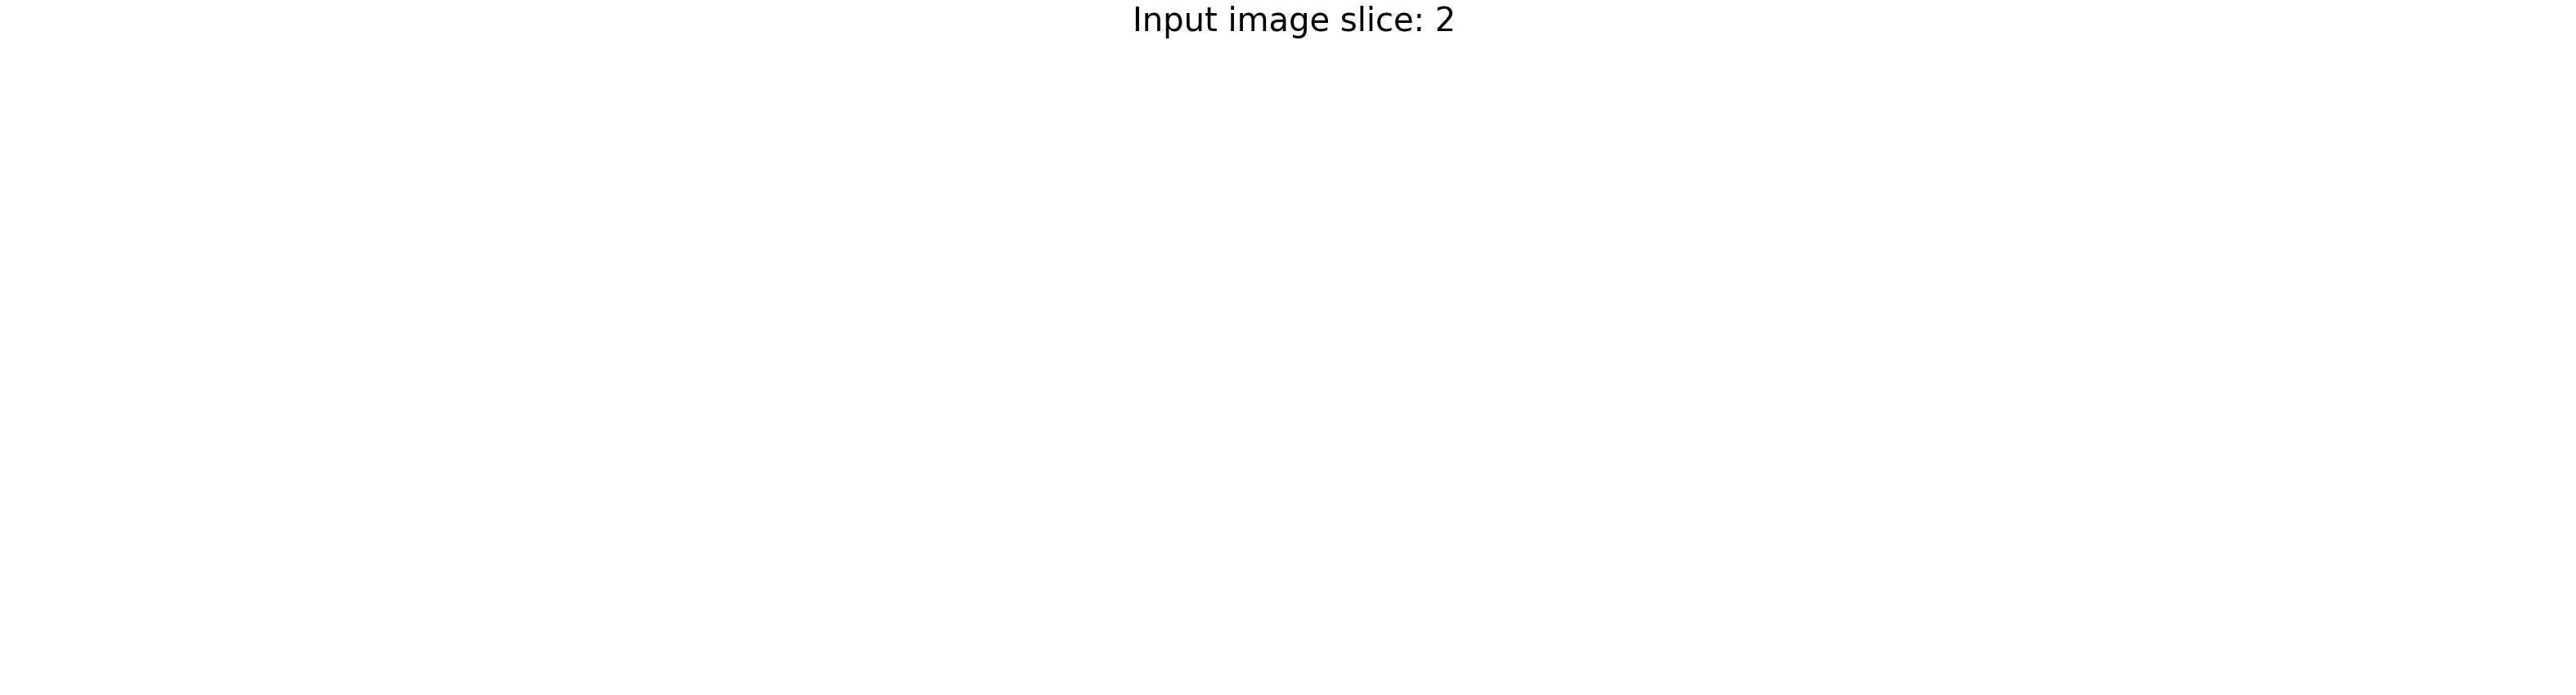

In [44]:
task = "Task03_Liver"
storeImageSlices(task,columns=4, sliceOffset=5)

In [ ]:
task = "Task01_BrainTumour"
storeActualImageSlices(task,columns=4, sliceOffset=5)

In [20]:
task = "Task01_BrainTumour"
storeActualImageSlices(task,columns=4, sliceOffset=5)

 Given Task :  Task01_BrainTumour
num_train = 484, num_test = 266
Image dimensions:
Train:
(240, 240, 155, 4)
(240, 240, 155, 4)
(240, 240, 155, 4)
(240, 240, 155, 4)
(240, 240, 155, 4)
Test:
(240, 240, 155, 4)
(240, 240, 155, 4)
(240, 240, 155, 4)
(240, 240, 155, 4)
(240, 240, 155, 4)
Image Min-Max values: Image = 0.0,2239.0 and label = 0.0,3.0
